Linear interpolation

In [20]:
def linear_interpolation(x1, y1, x2, y2, x):
  """Performs linear interpolation to estimate y value for a given x value."""
  return y1 + (y2-y1) + (x-x1) / (x2-x1)

#Given data points
years = [1981, 1983, 1985, 1987, 1989, 1991, 1993, 1995, 1997, 1999]
temps = [14.1999, 14.2411, 14.0342, 14.2696, 14.197, 14.3055, 14.1853, 14.3577, 14.4187, 14.3438]

even_years = [year for year in range(1982, 2000, 2)]
estimated_temps = []

#Perform linear interpolation for even years
for year in even_years:
  for i in range (len(years) - 1):
    if years[i] <= year < years[i+1]:
      temp = linear_interpolation(years[i], temps[i], years[i+1], temps[i+1], year)
      estimated_temps.append(temp)
      break

#Print the estimated temperatures for even years
for i in range(len(even_years)):
  print("Year:", even_years[i], "Estimated temperature:", estimated_temps[i])


Year: 1982 Estimated temperature: 14.7411
Year: 1984 Estimated temperature: 14.5342
Year: 1986 Estimated temperature: 14.7696
Year: 1988 Estimated temperature: 14.697
Year: 1990 Estimated temperature: 14.8055
Year: 1992 Estimated temperature: 14.6853
Year: 1994 Estimated temperature: 14.8577
Year: 1996 Estimated temperature: 14.9187
Year: 1998 Estimated temperature: 14.8438


Quadratic dan cubic interpolation tidak dapat digunakan karena data hanya memiliki 2 variable

Least square regression

In [21]:
import numpy as np

#Given data points
years = np.array([1981, 1983, 1985, 1987, 1989, 1991, 1993, 1995, 1997, 1999])
temps = np.array([14.1999, 14.2411, 14.0342, 14.2696, 14.197, 14.3055, 14.1853, 14.3577, 14.4187, 14.3438])

A = np.vstack([years, np.ones(len(years))]).T
m, c = np.linalg.lstsq(A, temps, rcond=None)[0]

#Estimate temperatures for even years
even_years = np.arange(1982, 2000, 2)
estimated_temps = m * even_years + c

#Print the estimated temperatures for even years
for i in range(len(even_years)):
  print("Year:", even_years[i], "Estimated temperature:", estimated_temps[i])

Year: 1982 Estimated temperature: 14.158033939393942
Year: 1984 Estimated temperature: 14.182345454545459
Year: 1986 Estimated temperature: 14.206656969696972
Year: 1988 Estimated temperature: 14.230968484848486
Year: 1990 Estimated temperature: 14.255279999999999
Year: 1992 Estimated temperature: 14.279591515151512
Year: 1994 Estimated temperature: 14.303903030303026
Year: 1996 Estimated temperature: 14.32821454545454
Year: 1998 Estimated temperature: 14.352526060606053


P

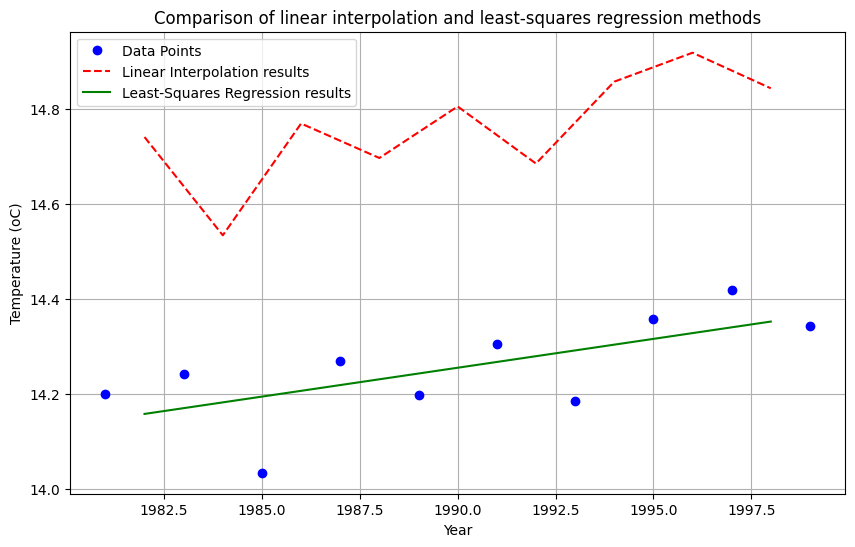

In [24]:
import matplotlib.pyplot as plt
import numpy as np

#Given data points
years = np.array([1981, 1983, 1985, 1987, 1989, 1991, 1993, 1995, 1997, 1999])
temps = np.array([14.1999, 14.2411, 14.0342, 14.2696, 14.197, 14.3055, 14.1853, 14.3577, 14.4187, 14.3438])

#Perform linear interpolation for even years

even_years = np.arange(1982, 2000, 2)
linear_interpol_temps = []
for year in even_years:
  for i in range(len(years) - 1):
    if years[i] <= year < years[i+1]:
      temp = linear_interpolation(years[i], temps[i], years[i+1], temps[i+1], year)
      linear_interpol_temps.append(temp)
      break

#Perform least squares regression
A = np.vstack([years, np.ones(len(years))]).T
m, c = np.linalg.lstsq(A, temps, rcond=None)[0]

#Estimate temperatures using least squares regression
regression_temps = m * even_years + c

#Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(years, temps, 'bo', label='Data Points')
plt.plot(even_years, linear_interpol_temps, 'r--', label='Linear Interpolation results')
plt.plot(even_years, regression_temps, 'g-', label='Least-Squares Regression results')
plt.xlabel('Year')
plt.ylabel('Temperature (oC)')
plt.title('Comparison of linear interpolation and least-squares regression methods')
plt.legend()
plt.grid(True)
plt.show()

Kedua metode (interpolation dan regression) menghasilkan hasil yang berbeda, bahkan perbedaannya cukup jauh.

Teori interpolasi, menurut Agustian (2023) adalah metode untuk menentukan titik yang belum diketahui nilainya menggunakan beberapa titik yang telah diketahui. Dalam fungsi diatas, hanya diketahui dua titik, maka jenis interpolasi yang digunakan adalah interpolasi linier.

Sedangkan regresi, menurut Kevin (2023) adalah  metode statistik yang menunjukkan hubungan atau pengaruh dari dua buah variabel atau lebih. Regresi juga dapat digunakan sebagai prediksi dengan pengolahan dataa kuantitatif. Metode yang digunakan dalam pengujian ini adalah metode kuadrat terkecil (least square), karena hasil perhitungannya lebih teliti.